In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

import matplotlib.pyplot as plt
import seaborn as sns

# стиль графиков
plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
%matplotlib inline

## О данных

https://data.mendeley.com/datasets/3t9vbwxgr5/2

Этот набор данных содержит список текстов песен с 1950 по 2019 год, описывающих музыкальные метаданные как грусть, танцевальность, громкость, акустичность и т. д. Также предоставлены тексты песен, которые можно использовать для обработки естественного языка.

Аудиоданные были очищены с помощью интегрированного движка Echo Nest® API с пакетом Spotipy Python. Spotipy API позволяет пользователю искать определенные жанры, исполнителей, песни, дату выпуска и т. д. Чтобы получить тексты песе ы использонфли API Lyrics Genius® в качестве базового URL-адреса для запроса данных на основе названия песни и имени исполнителя.

In [2]:
df = pd.read_csv('tcc_ceds_music.csv', index_col=False, engine='python')

print(df.shape)
df.head()

(28372, 31)


,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [4]:
df.dtypes

Unnamed: 0                    int64
artist_name                  object
track_name                   object
release_date                  int64
genre                        object
lyrics                       object
len                           int64
dating                      float64
violence                    float64
world/life                  float64
night/time                  float64
shake the audience          float64
family/gospel               float64
romantic                    float64
communication               float64
obscene                     float64
music                       float64
movement/places             float64
light/visual perceptions    float64
family/spiritual            float64
like/girls                  float64
sadness                     float64
feelings                    float64
danceability                float64
loudness                    float64
acousticness                float64
instrumentalness            float64
valence                     

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)

### Об атрибутах

Содержат информацию об исполнителе, названии песне, ее жанре, дату релиза. А так же музыкальные метаданные как грусть, танцевальность, громкость, акустичность и т. д., они выражены числом от 0 до 1.

## Новый атрибут

Например, можно добавить возраст песни относительно текущего года.

In [6]:
import datetime
current_year = datetime.datetime.now().year 

In [7]:
df['current_age_in_years'] = current_year - df['release_date']

## "Причесать" датасет: удалить выбросы и дубли, обработать пропущенные значения, найти кривые данные и т.п.

### Проверка на пропущенные значения

In [8]:
df.isna().sum().sum()

0

В этом датасете пропущенных значений нет, приведы пример их обработки:

```df['column_name'].fillna(df['column_name'].mean(), inplace=True)```

### Удаление дупликатов

In [9]:
df = df.drop_duplicates()

### Анализ атрибутов

In [10]:
df.columns

Index(['artist_name', 'track_name', 'release_date', 'genre', 'lyrics', 'len',
       'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'like/girls', 'sadness', 'feelings', 'danceability', 'loudness',
       'acousticness', 'instrumentalness', 'valence', 'energy', 'topic', 'age',
       'current_age_in_years'],
      dtype='object')

In [11]:
features = ['dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy']

In [12]:
enumerate(features)

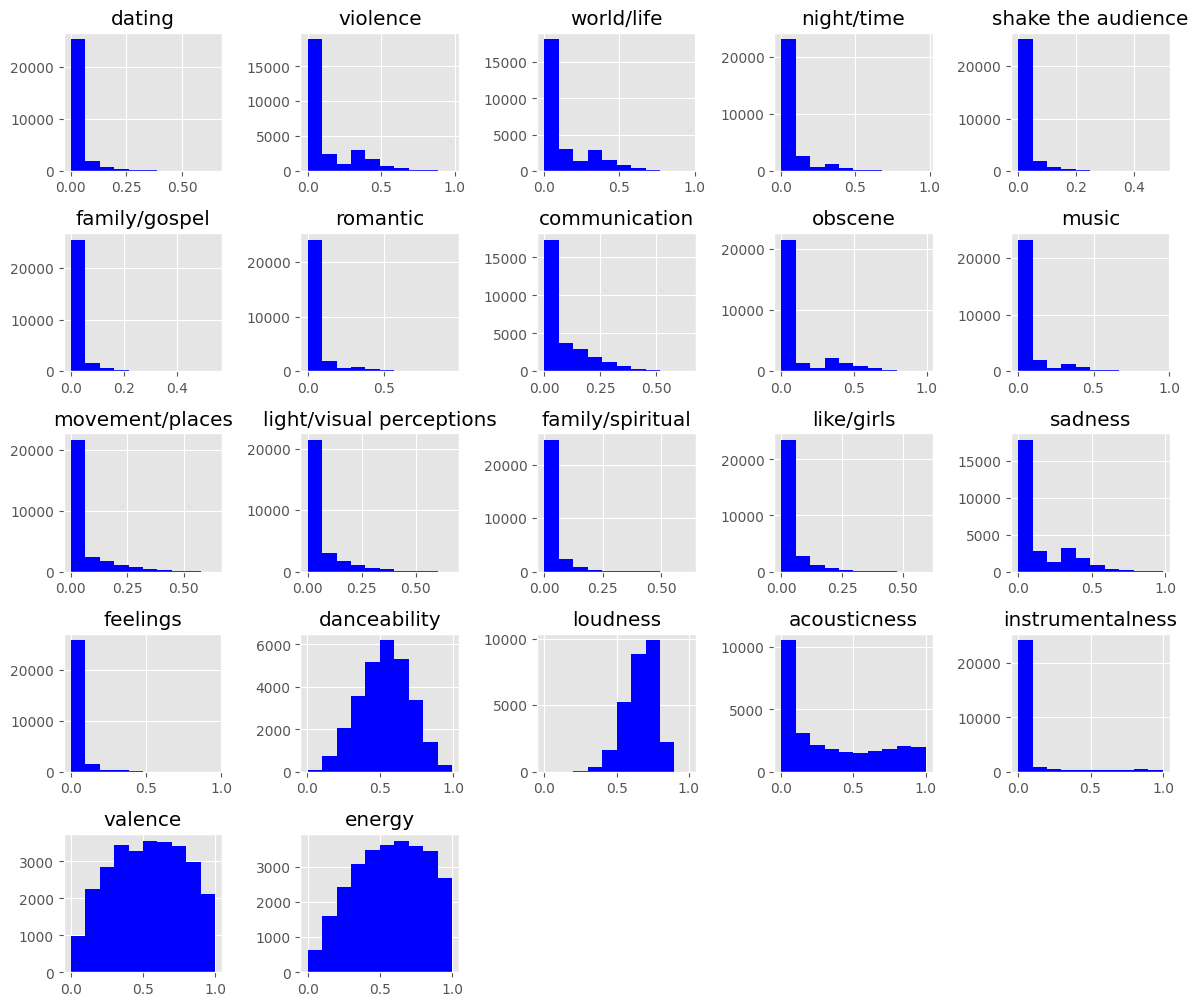

In [13]:
plt.figure(figsize=(12,50))
try:
    for i, col in enumerate(features):
        plt.subplot(25, 5, i + 1)
        plt.hist(df[col], label=col,color='blue')
        # plt.legend()
        plt.title(col)
        plt.tight_layout()
except Exception as e:
    print(col, e)

Видим, что все значения в пределах от 0 до 1, как и должно быть.

## Построить графики зависимости одной переменной от другой

### Корреляционная матрица

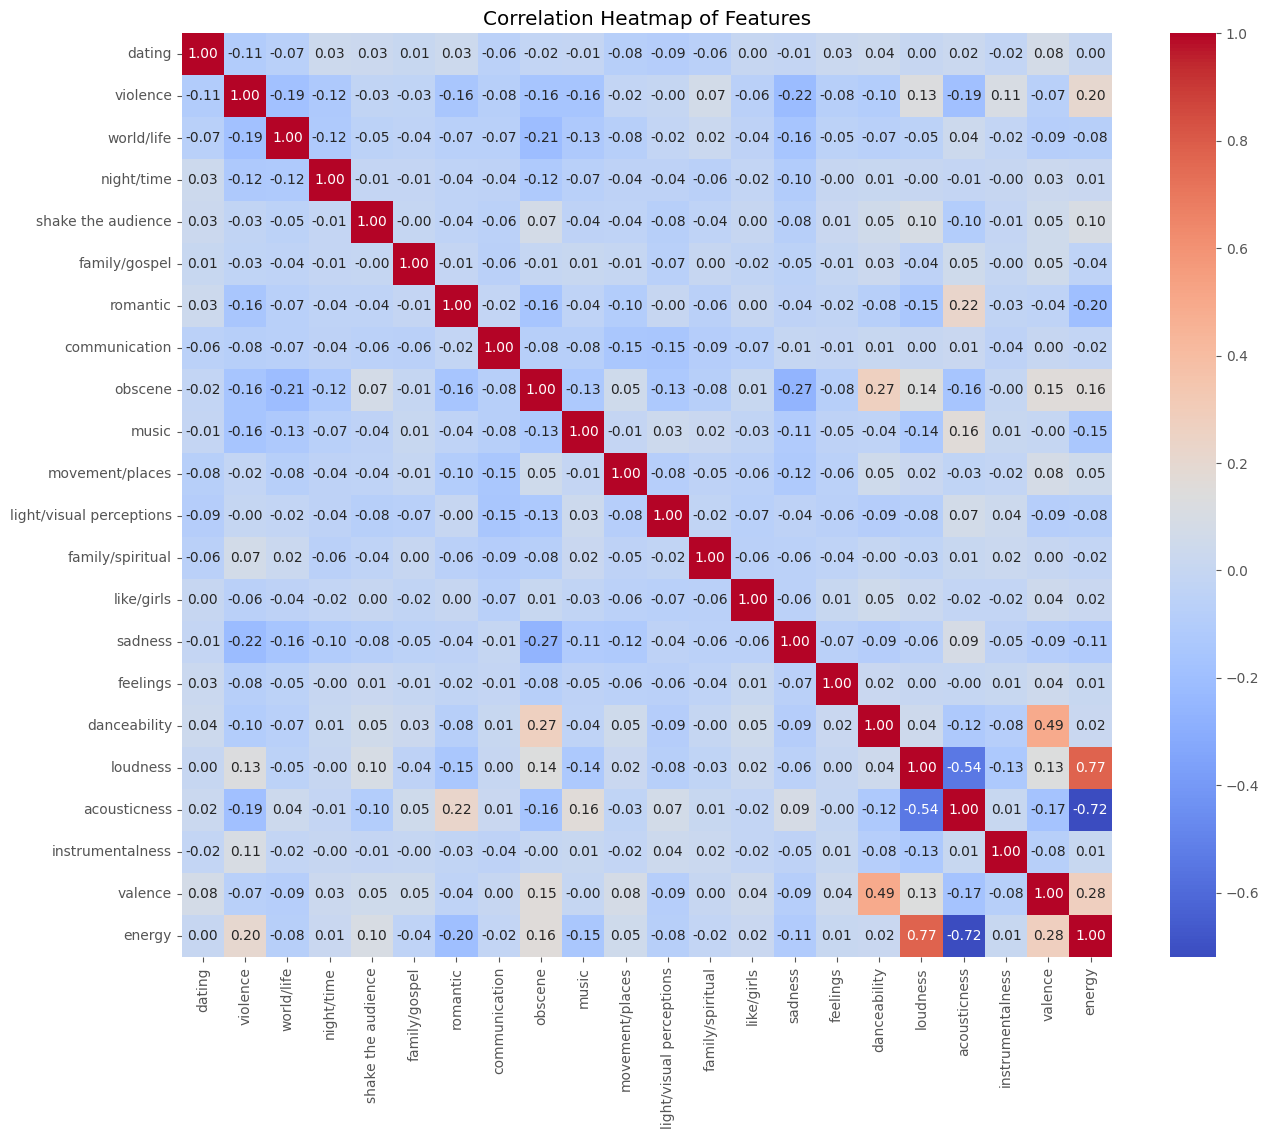

In [14]:
# Вычисление корреляционной матрицы
corr_matrix = df[features].corr()

# Создание тепловой карты
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

По корреляционной матрице можно заметить, что "энергия" и "громкость" высококоррелируемые атрибуты. "Энергия" и "акустичность" имеют обратную корреляцию.

### Матрица рассеивания

In [15]:
df['genre'].value_counts()

genre
pop        7042
country    5445
blues      4604
rock       4034
jazz       3845
reggae     2498
hip hop     904
Name: count, dtype: int64

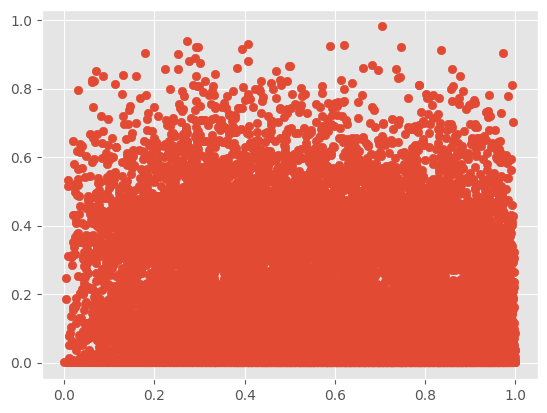

In [16]:
plt.scatter(df['energy'], df['sadness'])

Построить и проанализировать все 22 * 22 графика рассеивания сложно, тем более когда в выборки там много песен разных жанров и годов выпуска. На графике выше и аналогичных ему сложно выдлеить заметные кластеры.

Поэтому для изучения алгоритма K-means выбрана следующая задача: найти оптимальное количество кластеров с помощью "метода локтя" и проанализировать полученные кластеры.

## K-means

In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = df[df['release_date'] > 1990]
X = df[features]

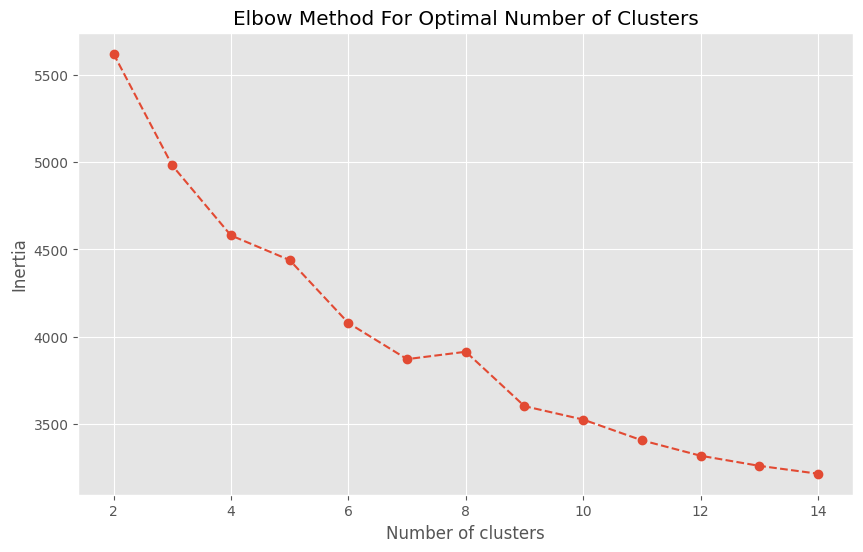

In [18]:
# Определение оптимального числа кластеров с использованием метода локтя
# Создадим список для инерции (сумма квадратов расстояний от точек до центроидов)
inertia = []
for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.grid(True)
plt.show()

Выберем 4 кластера, чтобы легче было проинтрепретировать.

In [19]:
# Применение K-means с оптимальным числом кластеров
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init= 'auto')
df['cluster'] = kmeans.fit_predict(X)

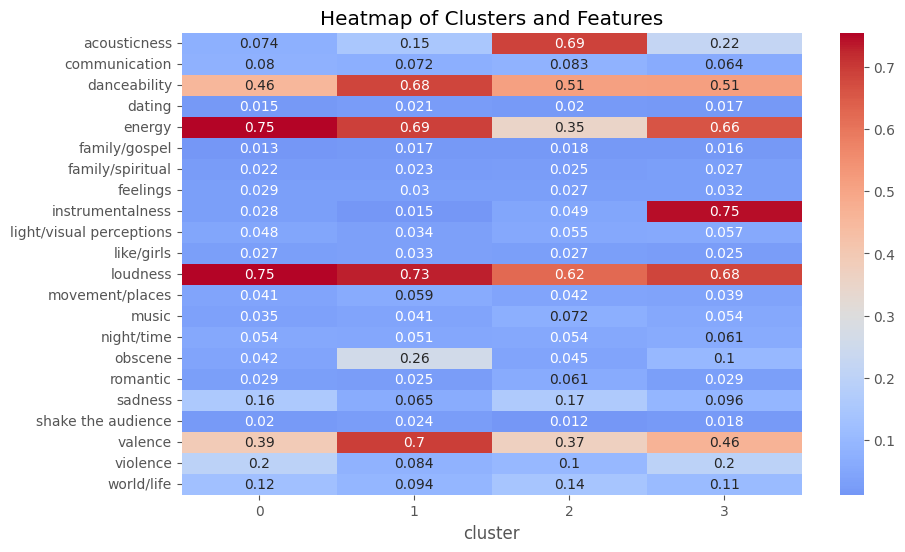

In [20]:
pivot_df = df[['cluster'] + features].pivot_table(index='cluster', aggfunc='mean').T
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", center=0.3)
plt.title('Heatmap of Clusters and Features')
plt.show()

По графику выше сложно заметить нужные отличия, так как цветом выделены наибольшие относительно всей таблицы значения, а не относительно строки. Попробуем построить другой график.

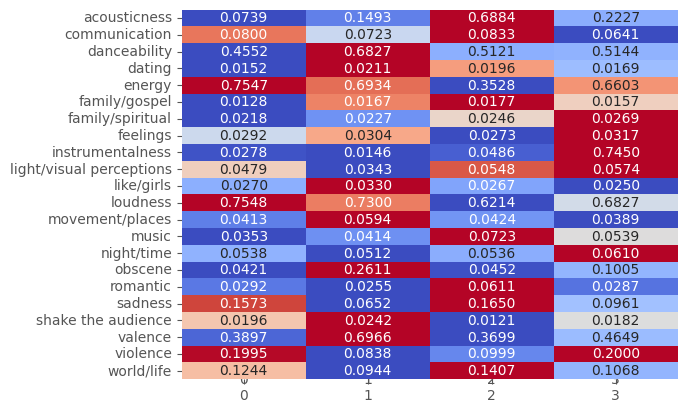

In [21]:
f, axs = plt.subplots(len(pivot_df.index), 1, gridspec_kw={'hspace': 0})

counter = 0
for index, row in pivot_df.iterrows():
    sns.heatmap(np.array([row.values]), yticklabels=[pivot_df.index[counter]], xticklabels=pivot_df.columns, annot=True, fmt='.4f', ax=axs[counter], cmap = 'coolwarm', cbar=False)
    counter += 1

for ax in f.axes: 
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    
plt.show()

In [22]:
df.groupby('cluster')['genre'].value_counts()

cluster  genre  
0        rock       1369
         pop        1338
         blues       862
         country     678
         jazz        347
         reggae      318
         hip hop      76
1        pop        1279
         reggae     1258
         hip hop     775
         country     727
         blues       534
         jazz        418
         rock        328
2        country     826
         jazz        645
         pop         576
         blues       568
         rock        258
         reggae      128
         hip hop      29
3        jazz        532
         blues       225
         rock        202
         pop          96
         reggae       42
         hip hop      13
         country      10
Name: count, dtype: int64

0. Кластер-0 "Злая":
    - Наиболее энергичная
    - Cамая громкая
    - Грустная иногда
    - Иногда жестокая.
1. Кластер-1 "Танцы":
   - Наиболее танцевальная
   - Не самая громкая
   - Наиболее "о девушках"
   - Не инструментальная
   - О "местах" и "движениях"
2. Кластер-2 "Романтика":
   - Акустическая
   - "Коммуникации"
   - Самая не энергичная
   - О семье
   - Самая грустная
   - Романтичная
3. Кластер-3 "Психология"
   - Не про девушек
   - Про ночь и ночное время
   - Больше о чувствах
   - Жестокая
   - Самая инструментальная

Теперь посмотрим на то, какие на самом деле жанры в этих кластерах преобладают:

In [23]:
df.groupby('cluster')['genre'].value_counts(normalize=True)

cluster  genre  
0        rock       0.274459
         pop        0.268244
         blues      0.172815
         country    0.135926
         jazz       0.069567
         reggae     0.063753
         hip hop    0.015237
1        pop        0.240459
         reggae     0.236511
         hip hop    0.145704
         country    0.136680
         blues      0.100395
         jazz       0.078586
         rock       0.061666
2        country    0.272607
         jazz       0.212871
         pop        0.190099
         blues      0.187459
         rock       0.085149
         reggae     0.042244
         hip hop    0.009571
3        jazz       0.475000
         blues      0.200893
         rock       0.180357
         pop        0.085714
         reggae     0.037500
         hip hop    0.011607
         country    0.008929
Name: proportion, dtype: float64

Видим, что распределение жанров по кластерам в целом логичное :)

## Вывод

В ходе выполнения лабораторной работы была проведена аналитика музыкального датасета, содержащего информацию о текстах песен, их характеристиках, а также их метаданных.х предпочтений.

### Предобработка данных:

Изначальный датасет содержал 31 колонку. Некоторые из них были числовыми, другие - категориальными. Проведена работа по удалению лишних столбцов и корректной обработке данных для последующего анализа.
Пропущенных значений в данных не обнаружено, что позволило сразу перейти к анализу.


### Визуализация данных:

Были построены гистограммы для каждого из выбранных признаков, чтобы понять распределение данных. Это помогло убедиться в корректности диапазона значений (0-1) для многих признаков.
Корреляционная матрица и тепловая карта показали, какие признаки наиболее коррелируют между собой. Например, "энергия" и "громкость" оказались высококоррелируемыми.



### Кластеризация:
Применен метод K-means для кластеризации данных. С использованием метода локтя было определено оптимальное количество кластеров, равное 4.


Кластеры были описаны и интерпретированы на основе характеристик песен внутри каждого кластера. Например, один из кластеров можно описать как "Злая" музыка, другой как "Танцевальная", третий как "Романтическая", и четвертый как "Психологическая".


Анализ жанров песен внутри кластеров подтвердил логичность распределения: некоторые жанры доминируют в определенных кластерах, что указывает на характеристики их музыкального содержания.


В целом, результаты лабораторной работы позволили глубоко погрузиться в анализ музыкальных данных, идентифицировать ключевые группы и понять, какие характеристики определяют принадлежность песни к определенному кластеру. Эта информация может быть полезной для музыкальных платформ, стриминговых сервисов или исследовательских проектов в области анализа музыкальных предпочтений.